## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to see all the columns of data
pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis

Steps In EDA: 
    1. Missing Values
    2. All The Numerical Variables
    3. Distribution of the Numerical Variables
    4. Categorical Variables
    5. Cardinality of Categorical Variables
    6. Outliers
    7. Relationship between independent and dependent feature(SalePrice)

In [4]:
# let's check the shape of the dataset
dataset.shape

(1460, 81)

In [5]:
# We will check for missing values
features = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1]

for feature in features:
    print(f'{feature} has {np.round(dataset[feature].isnull().mean(), 2)}% of data missing')

LotFrontage has 0.18% of data missing
Alley has 0.94% of data missing
MasVnrType has 0.01% of data missing
MasVnrArea has 0.01% of data missing
BsmtQual has 0.03% of data missing
BsmtCond has 0.03% of data missing
BsmtExposure has 0.03% of data missing
BsmtFinType1 has 0.03% of data missing
BsmtFinType2 has 0.03% of data missing
FireplaceQu has 0.47% of data missing
GarageType has 0.06% of data missing
GarageYrBlt has 0.06% of data missing
GarageFinish has 0.06% of data missing
GarageQual has 0.06% of data missing
GarageCond has 0.06% of data missing
PoolQC has 1.0% of data missing
Fence has 0.81% of data missing
MiscFeature has 0.96% of data missing


#### So our dataset has missing values 

let's handle the missing values in feature engineering session

#### Now let's check whether the missing values has some relationship with our target variable

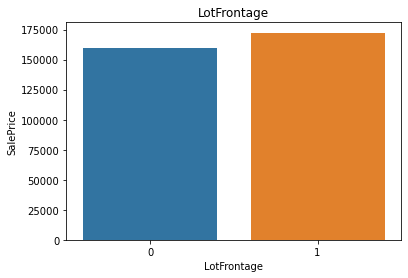

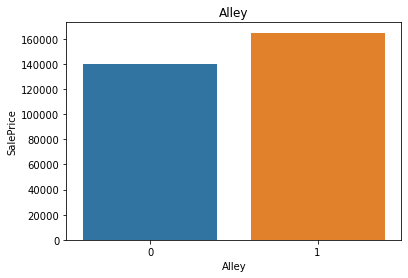

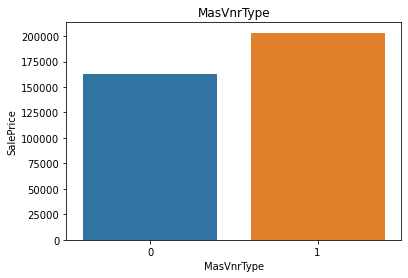

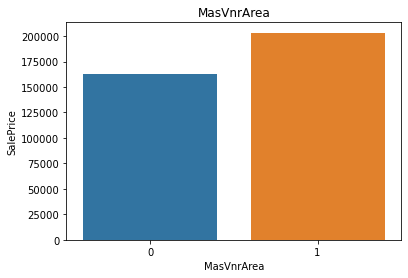

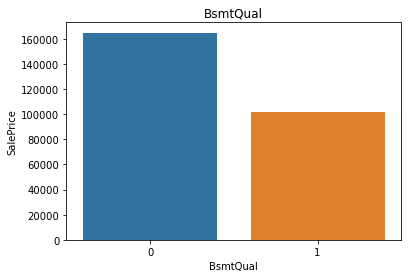

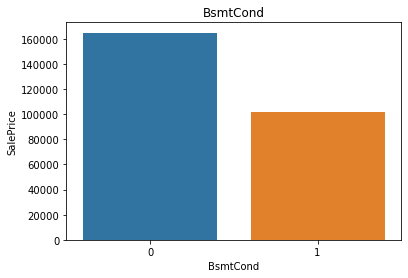

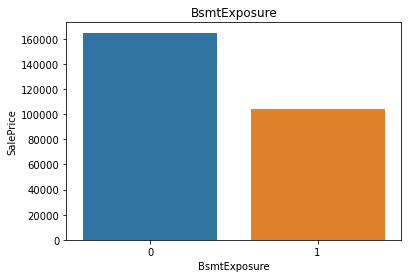

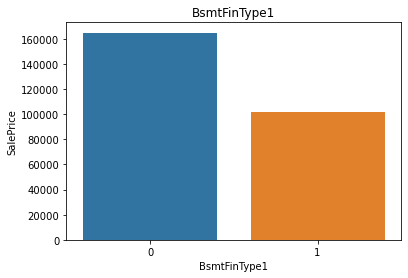

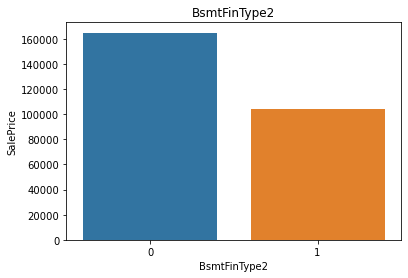

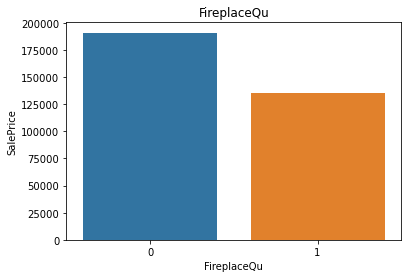

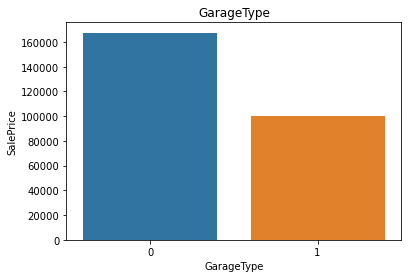

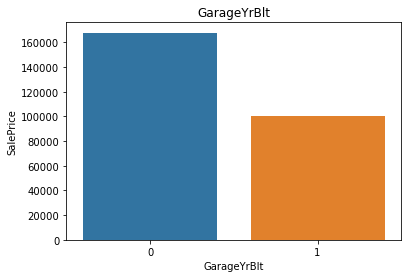

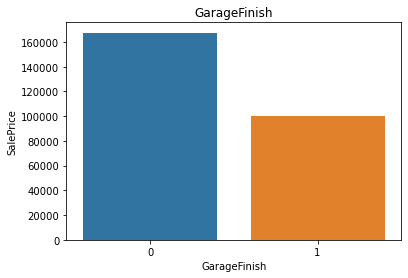

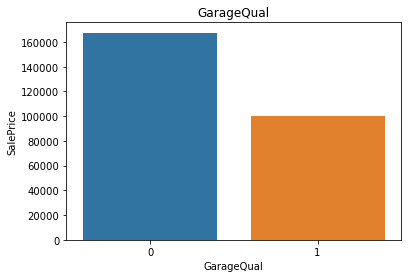

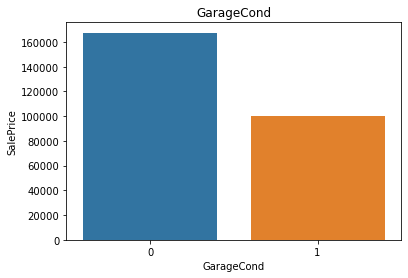

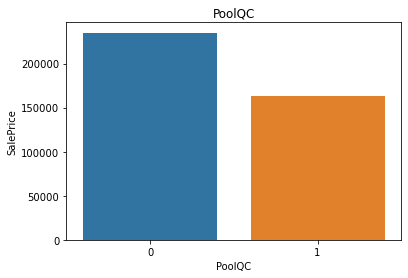

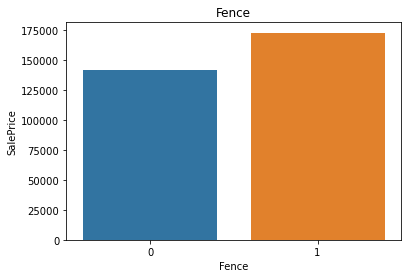

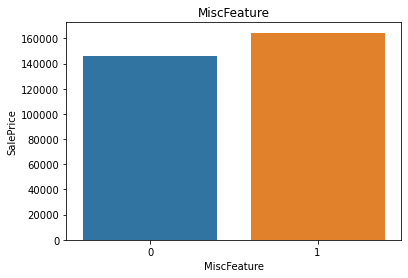

In [6]:
for feature in features:
    # copying the dataset 
    data = dataset.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    sns.barplot(x = feature, y= 'SalePrice', data=data, ci=False, estimator=np.median) 
  
#     data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

#### It's clearly visible that there is relationship between missing values and target variable 
#### we will perform imputation on feature engineering session

### Numerical Variables

In [7]:
numeric_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print(f' Numeric feature has {len(numeric_features)} variables')
dataset[numeric_features].head()

 Numeric feature has 38 variables


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Data Analysis
* Temporal data is often a companion to spatial data, and it is any data with a time or date associated with it. ... 
* Temporal data helps us see patterns through time, and make predictions about the future.

### Temporal Variables 
    From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. 
    * One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. We will be performing this analysis in the Feature Engineering which is the next video.

In [8]:
year_feature = [feature for feature in numeric_features if 'Yr' in feature or 'Year' in feature]
dataset[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [9]:
# lets check the values the present in year features
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

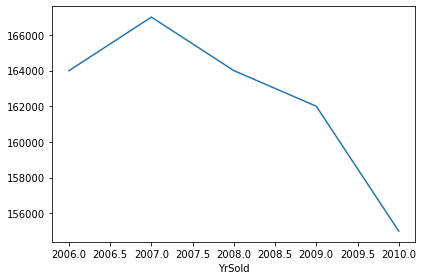

In [10]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.tight_layout()

As year sold increases the sale price decreases(older houses has less price)

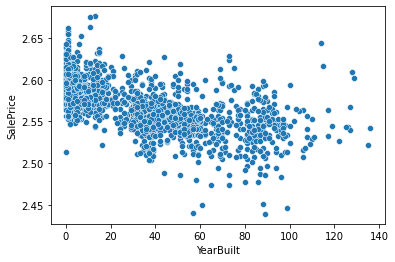

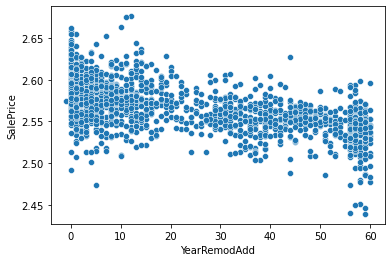

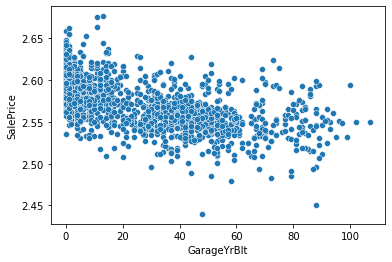

In [71]:
## Here we will compare the difference between All years feature with SalePrice
for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        
        # lets find the difference b\w year_sold and all year features
        data[feature] = data['YrSold'] - data[feature]
        
        sns.scatterplot(x=feature, y='SalePrice', data=data)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

### It's clearly visible that higher the difference b\w the Yrsold and Year_features 
### the Sale Price is decreasing...
#### ex: if the differnce b\w the Year_Built and YrSold is high the SalePrice is decreasing 

In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature = [feature for feature in numeric_features if dataset[feature].nunique() < 25 and feature not in year_feature+['Id']]
print('Discrete Variable count: {}'.format(len(discrete_feature)))
dataset[discrete_feature].head()

Discrete Variable count: 17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


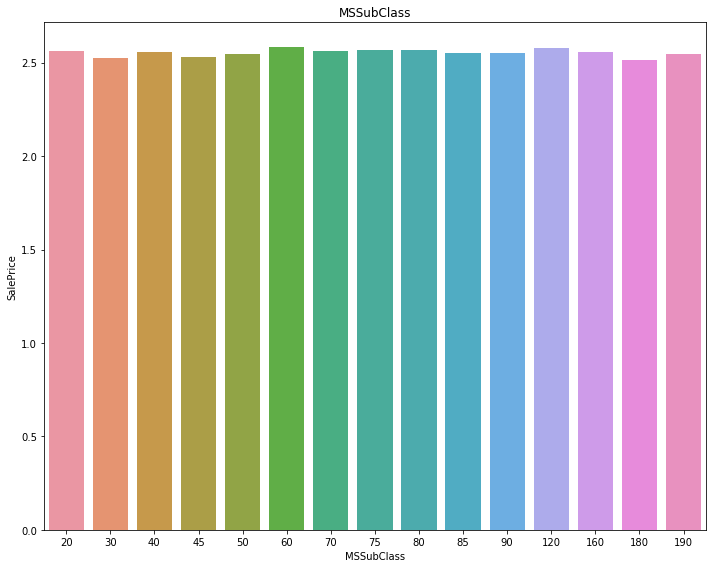

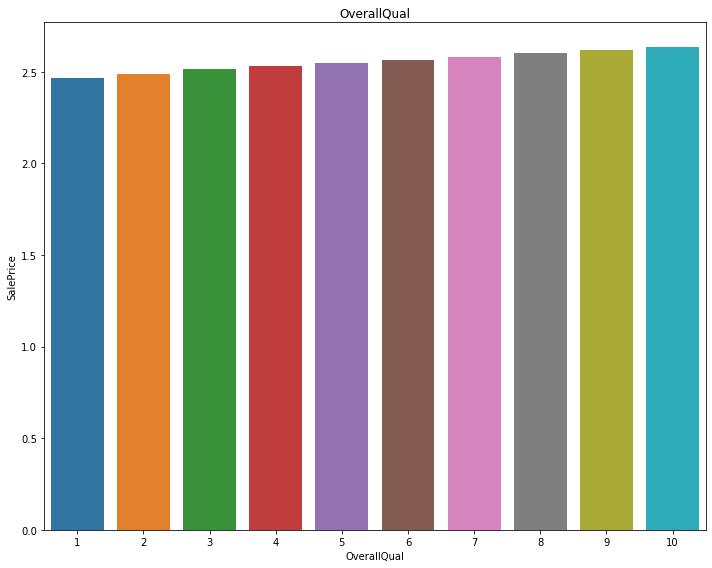

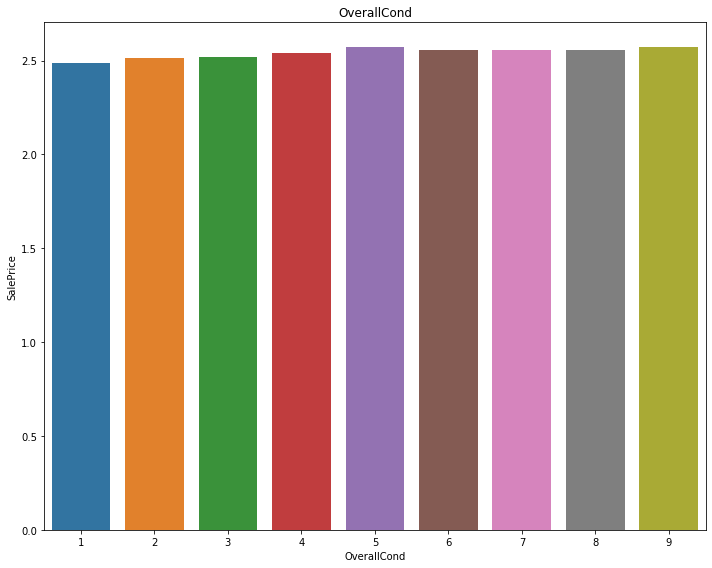

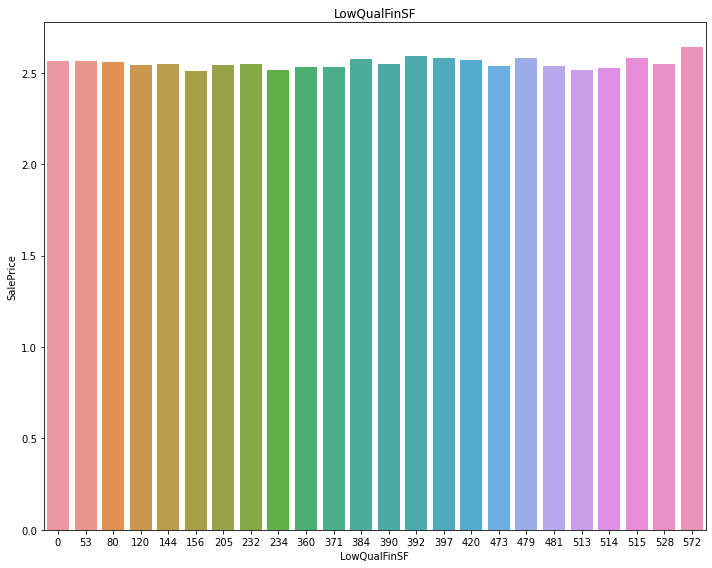

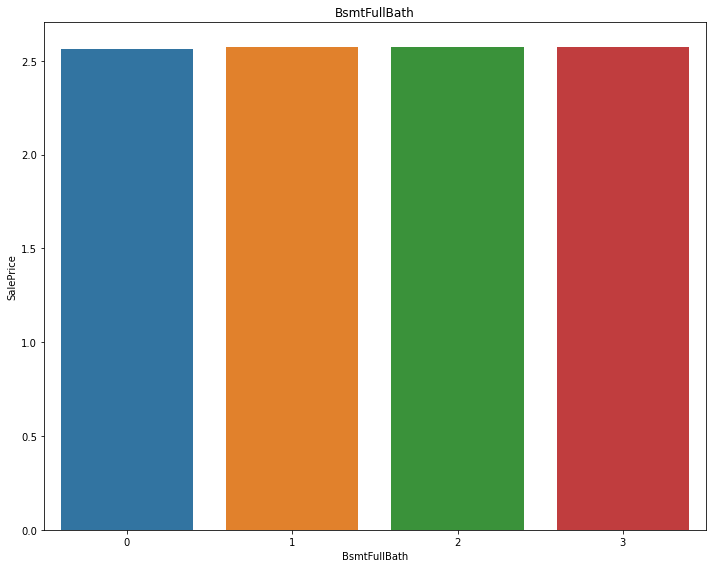

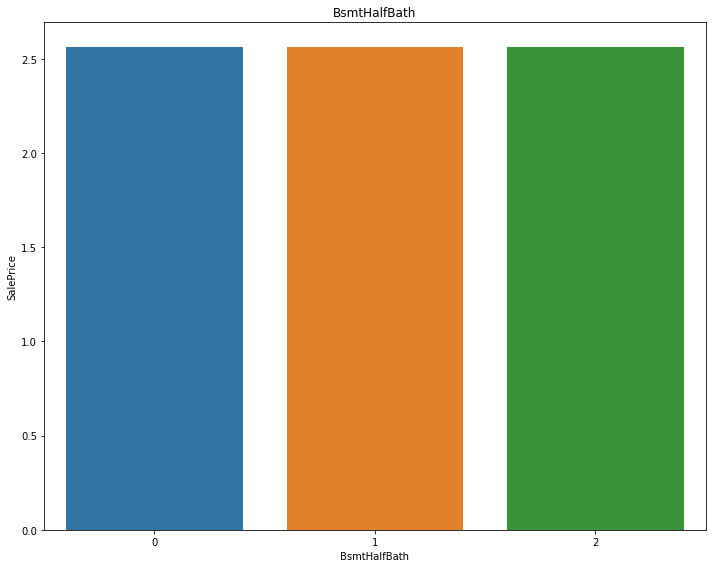

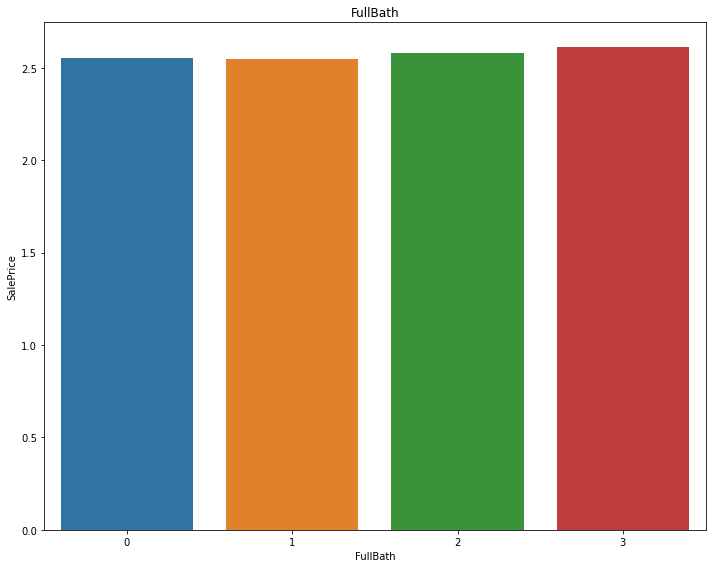

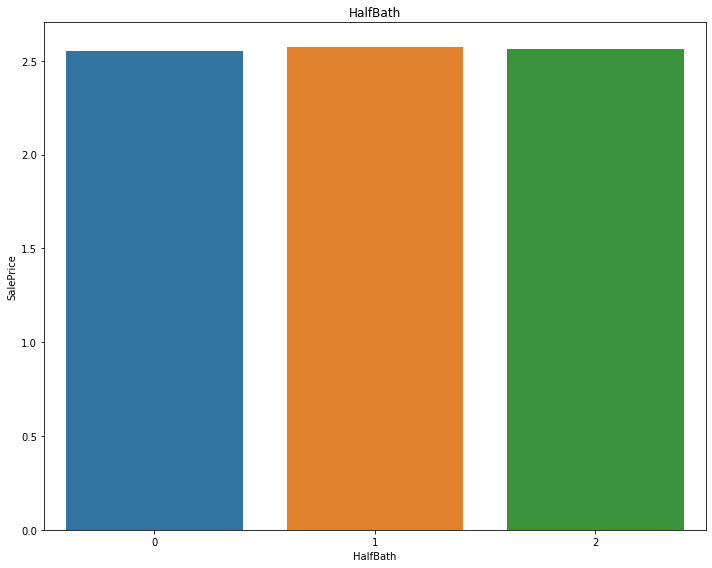

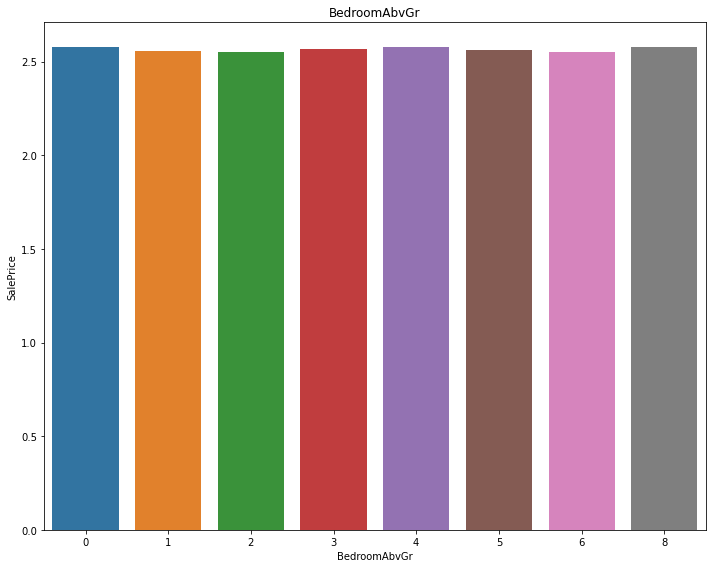

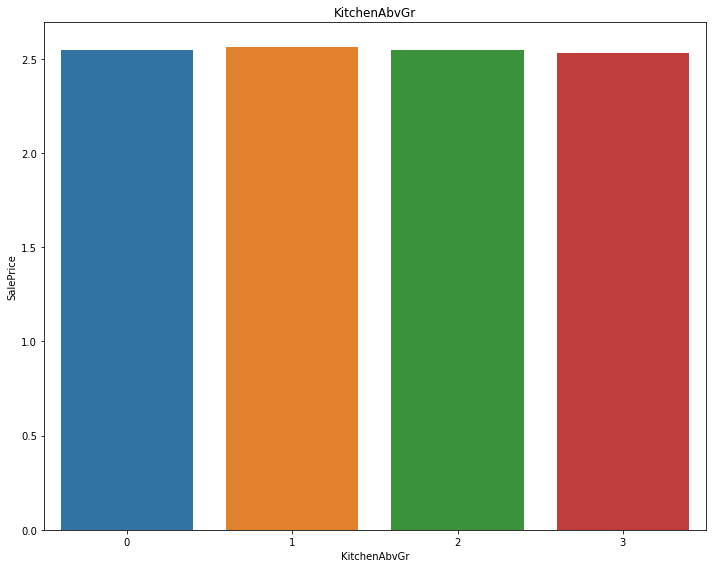

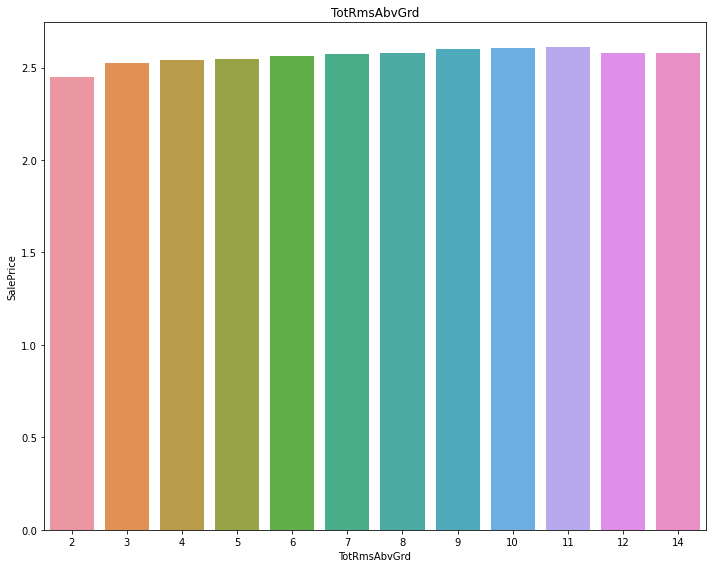

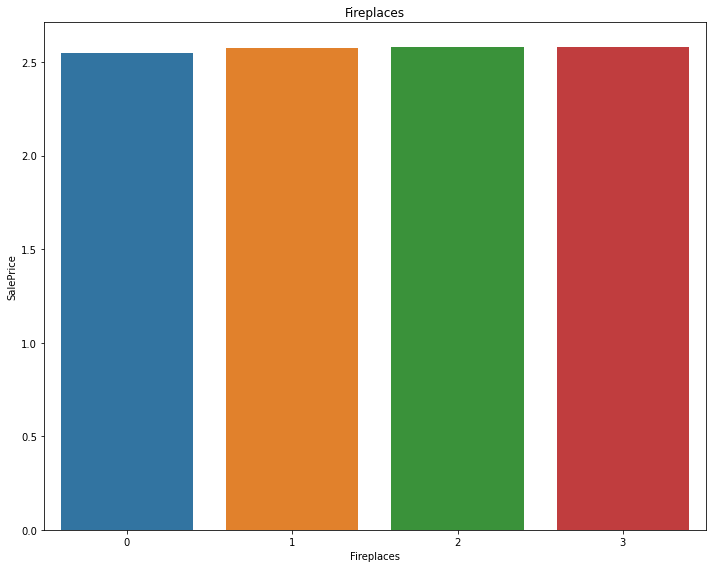

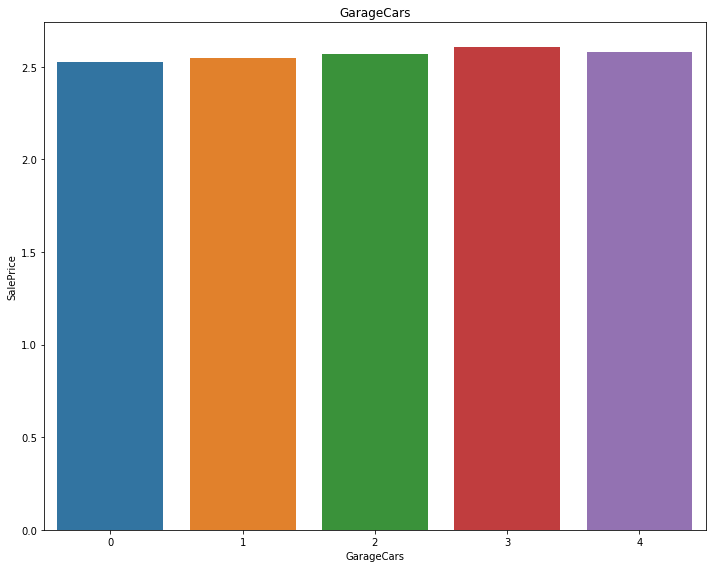

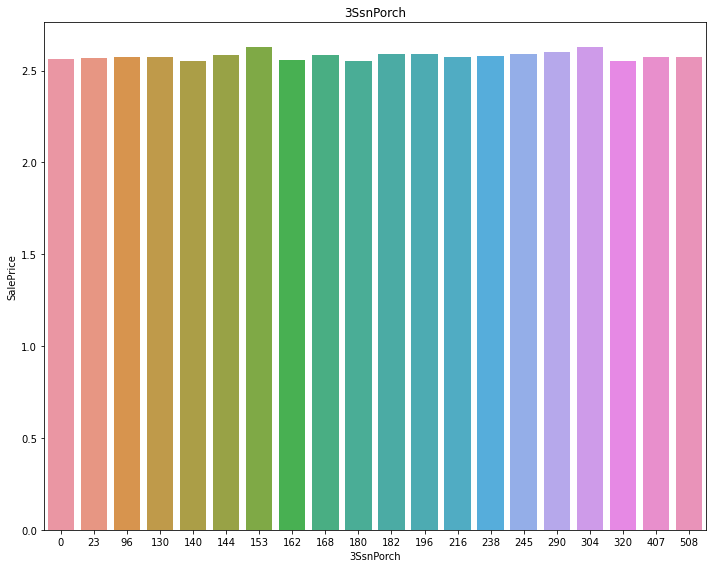

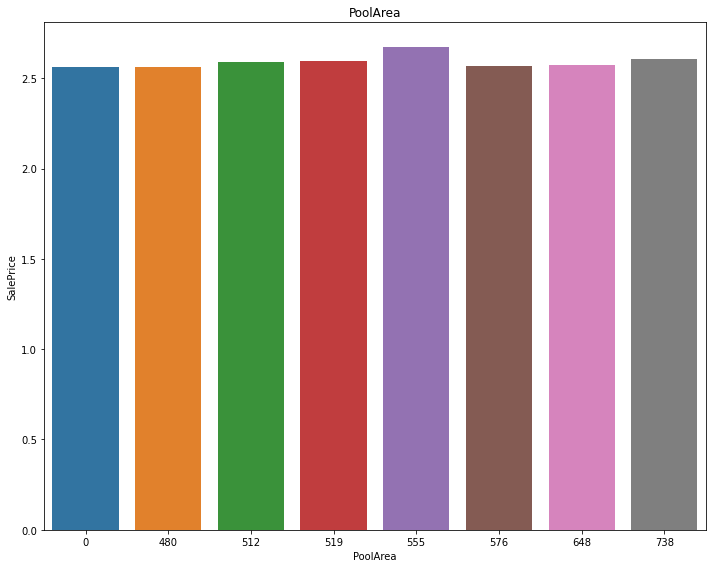

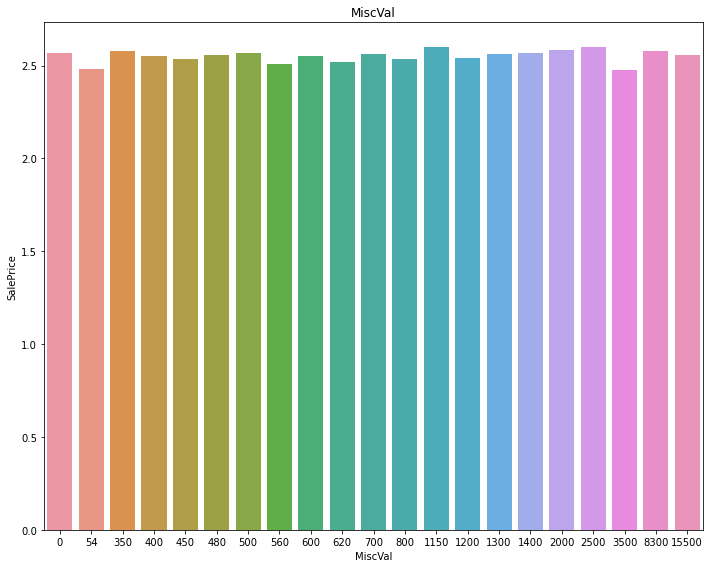

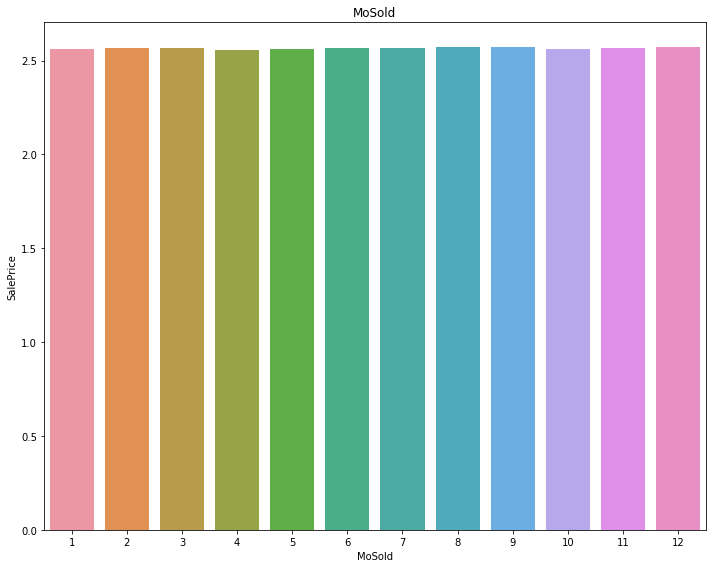

In [72]:
# lets check the relationship b\w the discrete features and SalePrice

for feature in discrete_feature:
    data = dataset.copy()
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature, y='SalePrice', data=data, estimator=np.median, ci=False)
    plt.title(feature)
    plt.tight_layout()
    plt.show()

### Monotonic Relationship
#### there is relationship b\w discrete features and Sale Price
#### OverAllQual and SalePrice has monotonic relationship(exponential raise)
#### monotonic relationship(exponential raise): the size of one variable increases as the other variables also increases

In [15]:
continuous_feature = [feature for feature in numeric_features  if feature not in discrete_feature + year_feature+ ['Id']]
print('Continuous Variable count: {}'.format(len(continuous_feature)))
dataset[continuous_feature].head()

Continuous Variable count: 16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


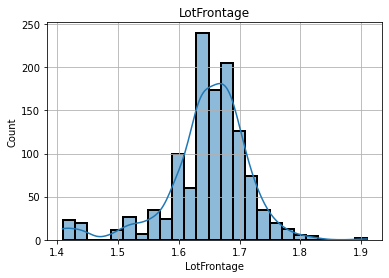

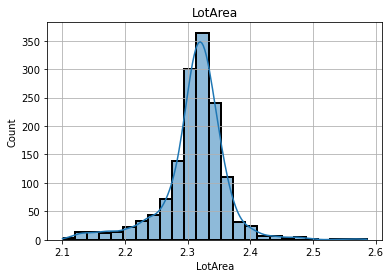

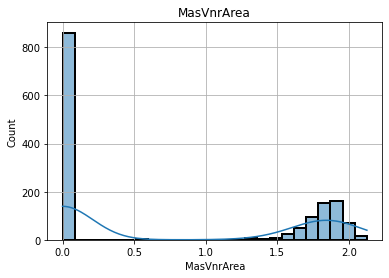

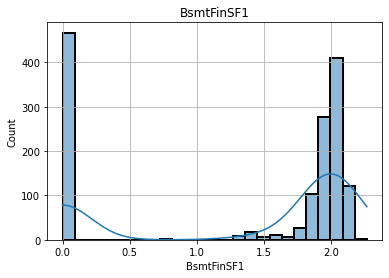

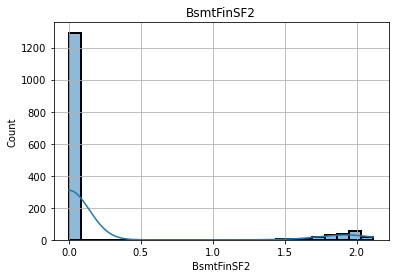

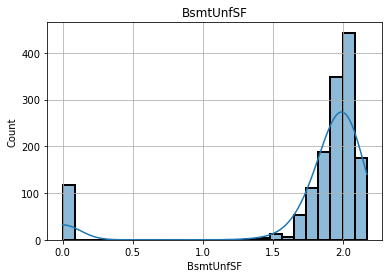

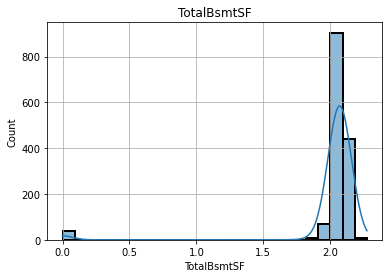

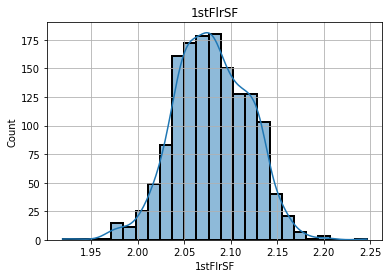

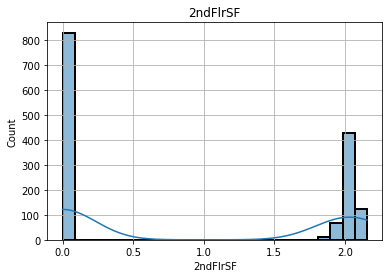

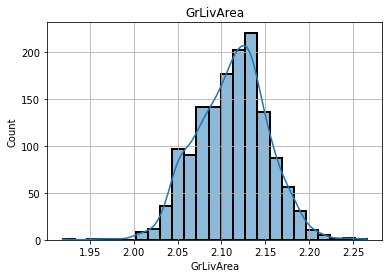

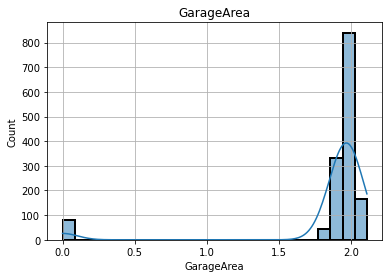

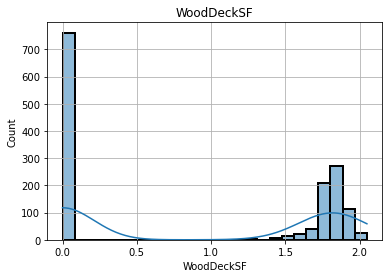

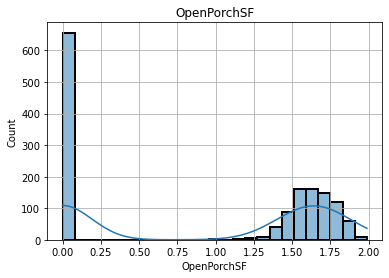

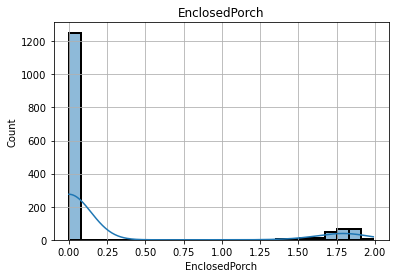

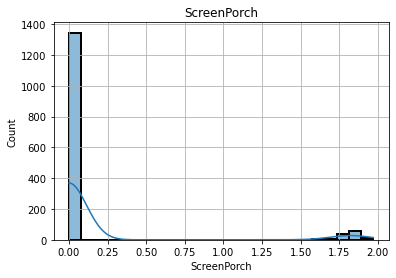

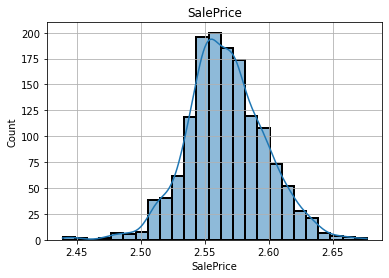

In [73]:
# lets check the distribution of continuous feature
for feature in continuous_feature:
    data = dataset.copy()
#     plt.hist(data[feature], bins=30,ec='black', lw=1.5)
    plt.grid()
    sns.histplot(data[feature], bins=25, edgecolor="k", linewidth=2, kde=True)
    plt.title(feature)
    plt.show()

In [20]:
# some of the feature in continuous feature has skewed data 

## Outliers

### Box Plot only for Continuous Variables not for categorical variables 

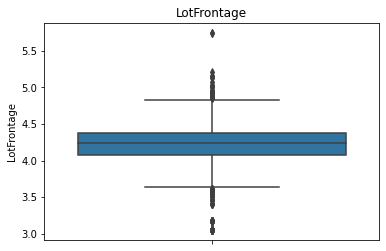

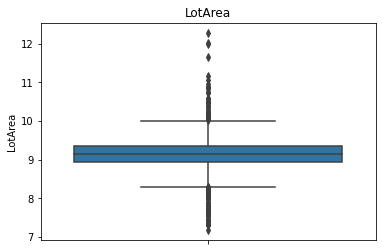

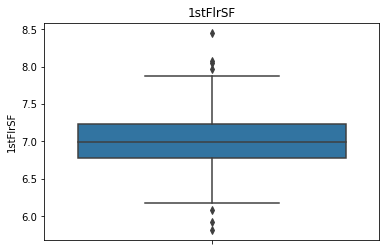

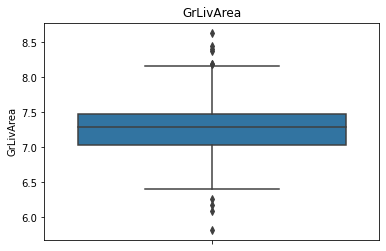

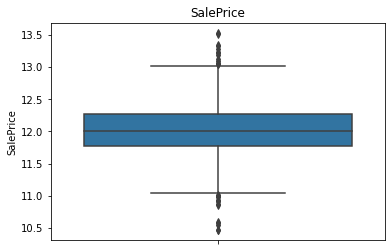

In [46]:
for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():  # log0 is not defined...
        pass
    else:
        data[feature] = np.log(data[feature])  # u can also use logp1()
        sns.boxplot(y = feature,data=data, orient='v')
        plt.title(feature)
    #     data.boxplot(column=feature)
        plt.show();

In [ ]:
# Lets handle this outliers in feature engineering
# lets perform Log Transformation for skewed data(Continuous variable)

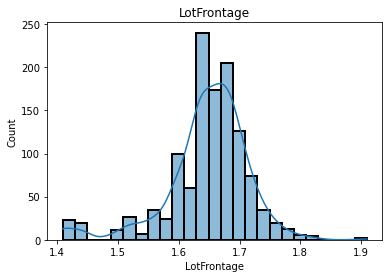

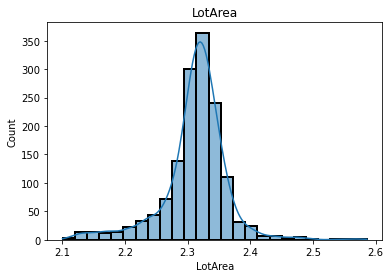

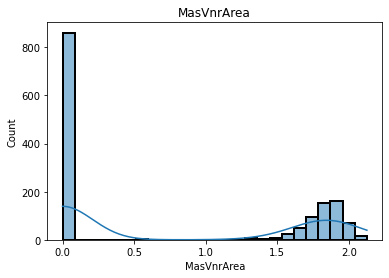

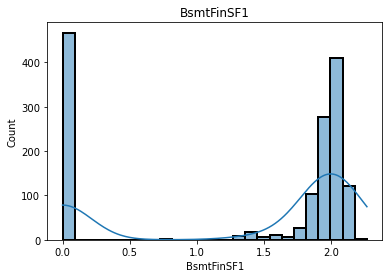

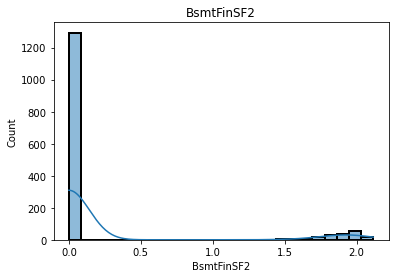

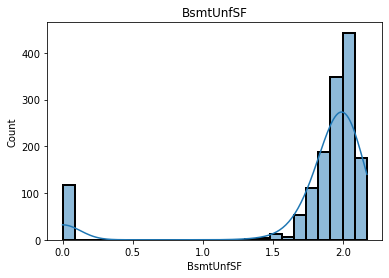

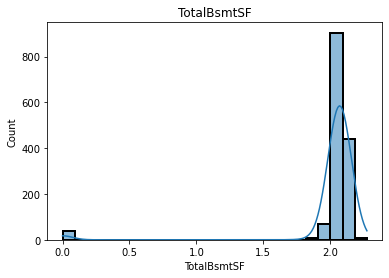

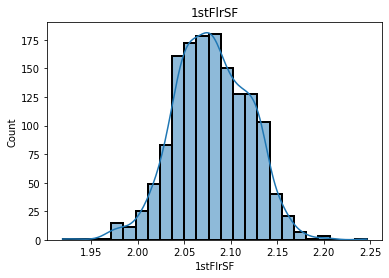

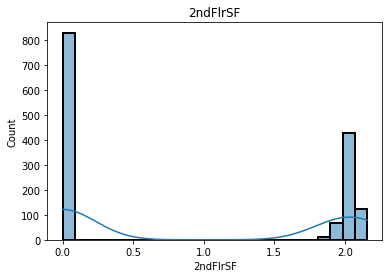

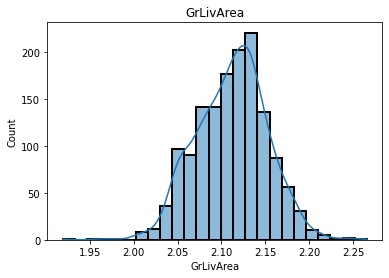

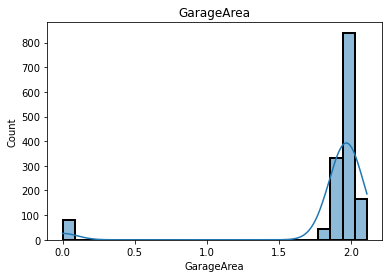

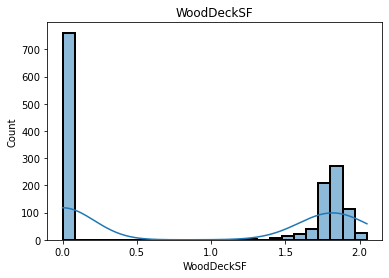

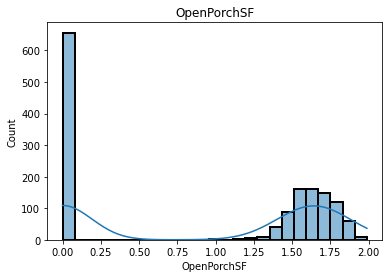

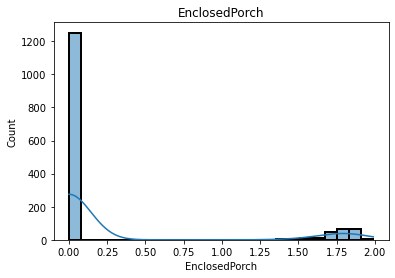

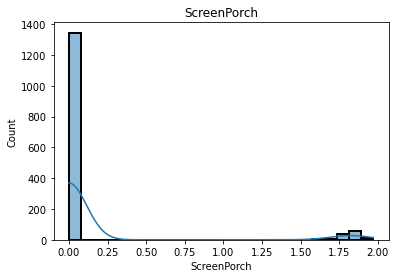

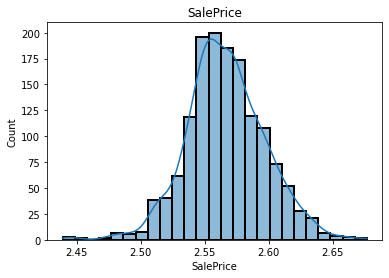

In [48]:
# Log transformation on continuous variable

for feature in continuous_feature:
    
    dataset[feature] = np.log1p(dataset[feature])
    sns.histplot(dataset[feature], bins=25, ec='black', lw='2', kde=True)  
    plt.title(feature)
    plt.show()

### For Categorical Variables

In [50]:
categorical_feature = [feature for feature in dataset.columns if dataset[feature].dtype=='O']
print('The Categorical Variable Count: {}'.format(len(categorical_feature)))

The Categorical Variable Count: 43


In [52]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### cardinality value - No of categories or labels in a categorical feature

In [58]:
# lets check the cardinality value for categorical feature

for feature in categorical_feature:
    print('The {} Feature has {} categories or labels '.format(feature, dataset[feature].nunique()))

The MSZoning Feature has 5 categories or labels 
The Street Feature has 2 categories or labels 
The Alley Feature has 2 categories or labels 
The LotShape Feature has 4 categories or labels 
The LandContour Feature has 4 categories or labels 
The Utilities Feature has 2 categories or labels 
The LotConfig Feature has 5 categories or labels 
The LandSlope Feature has 3 categories or labels 
The Neighborhood Feature has 25 categories or labels 
The Condition1 Feature has 9 categories or labels 
The Condition2 Feature has 8 categories or labels 
The BldgType Feature has 5 categories or labels 
The HouseStyle Feature has 8 categories or labels 
The RoofStyle Feature has 6 categories or labels 
The RoofMatl Feature has 8 categories or labels 
The Exterior1st Feature has 15 categories or labels 
The Exterior2nd Feature has 16 categories or labels 
The MasVnrType Feature has 4 categories or labels 
The ExterQual Feature has 4 categories or labels 
The ExterCond Feature has 5 categories or lab

In [59]:
# some of the feature has high number of categories..

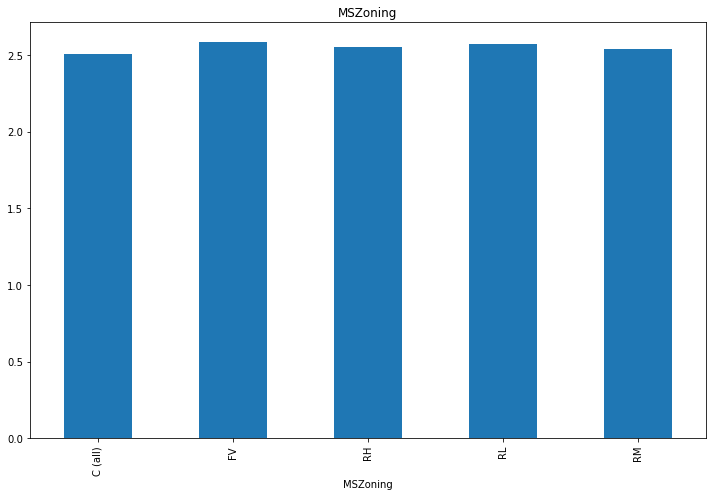

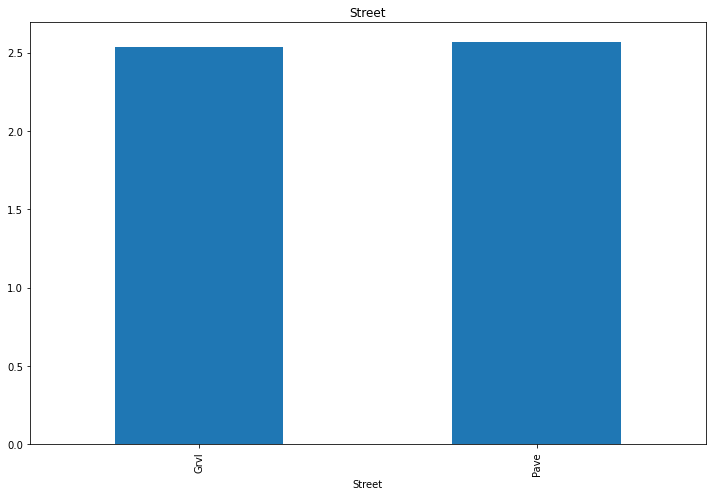

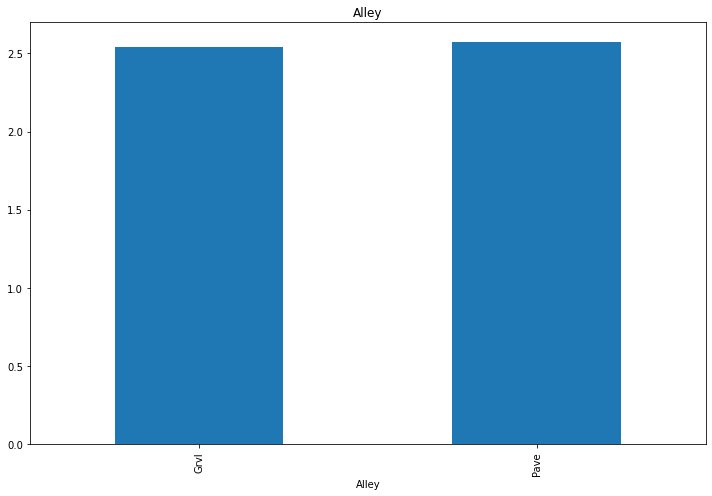

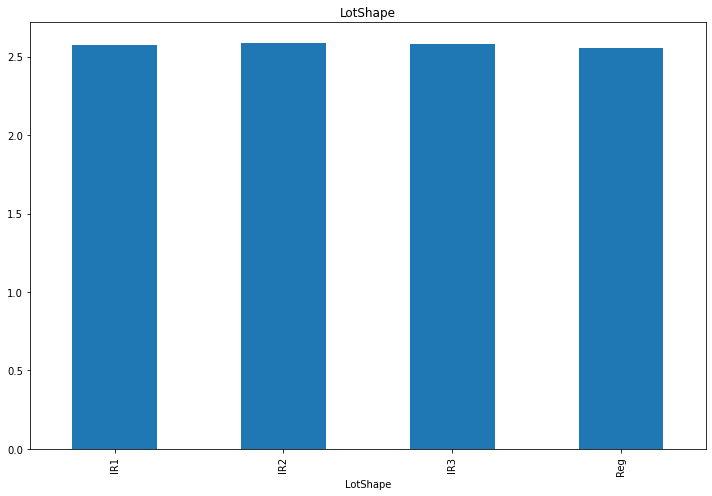

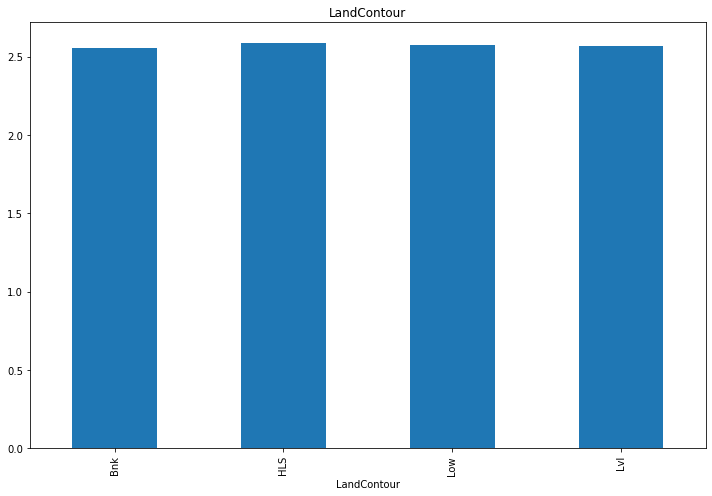

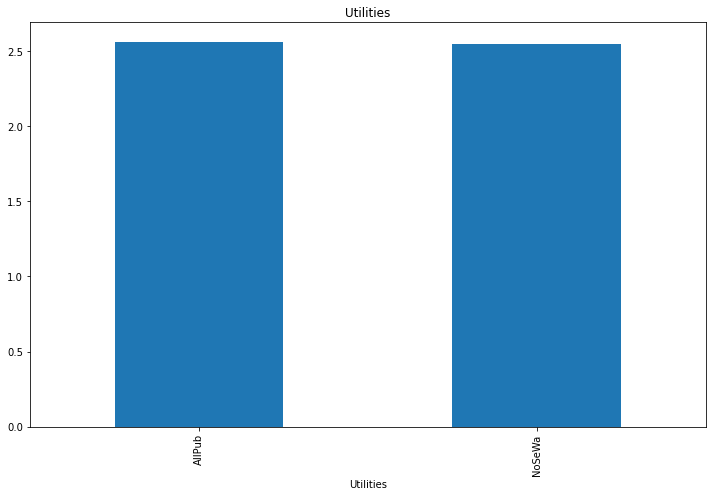

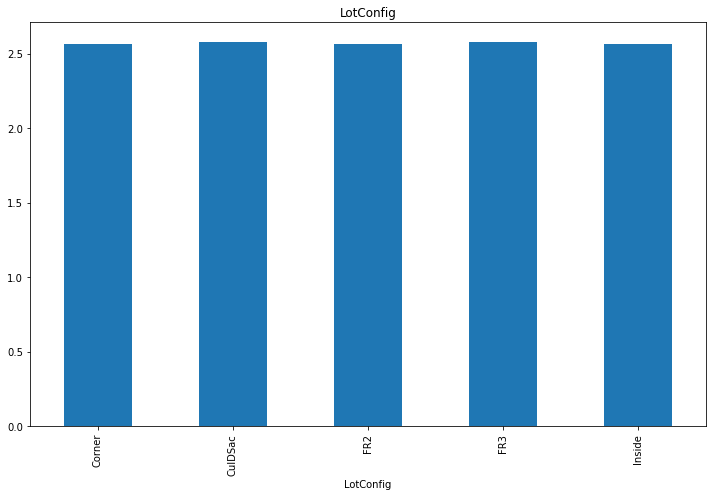

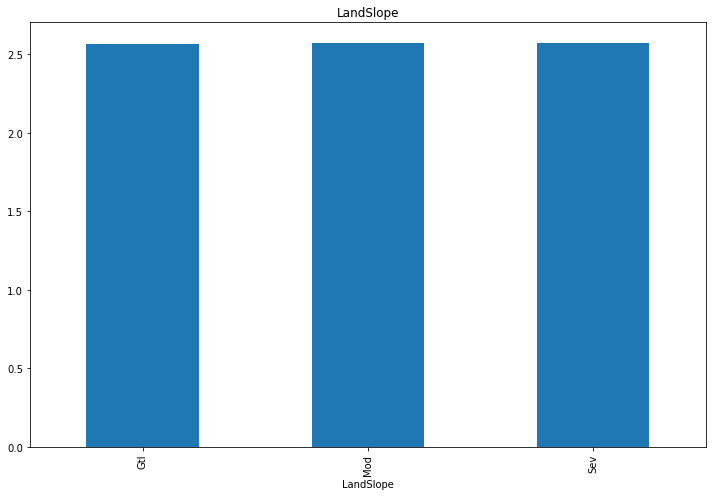

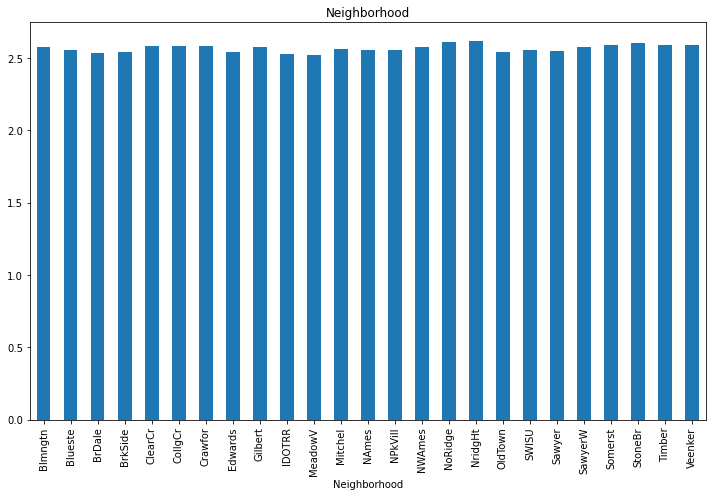

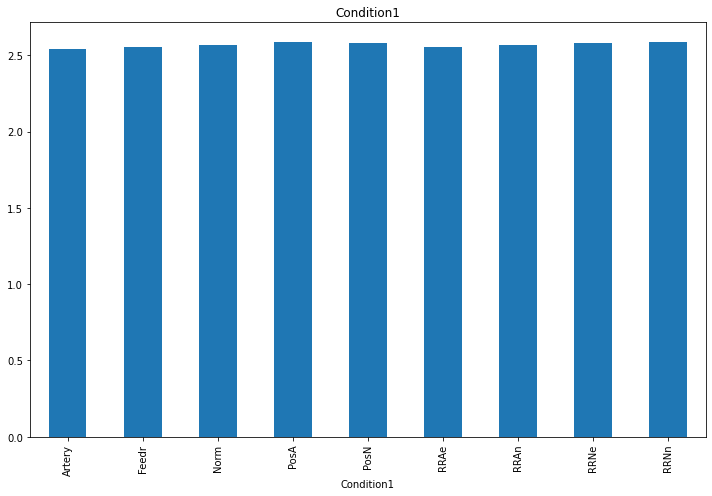

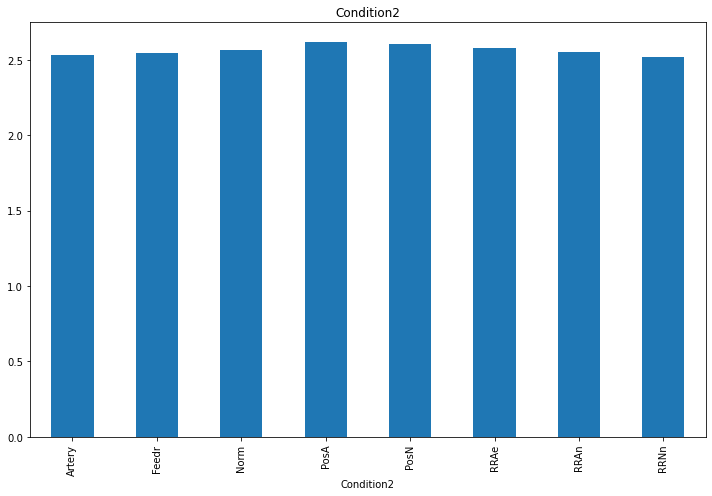

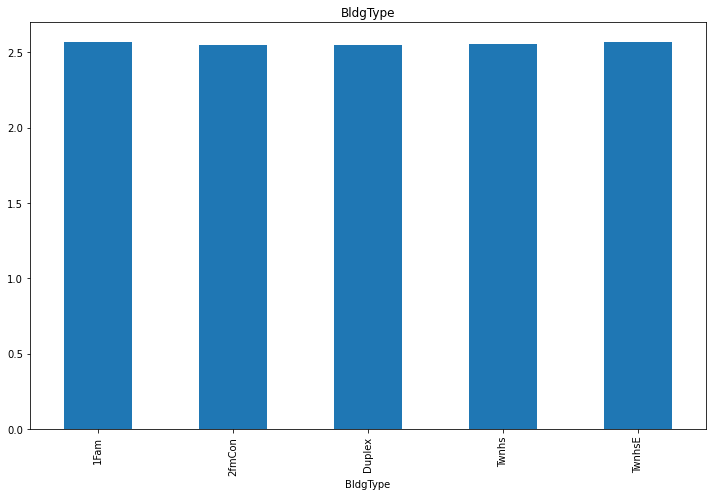

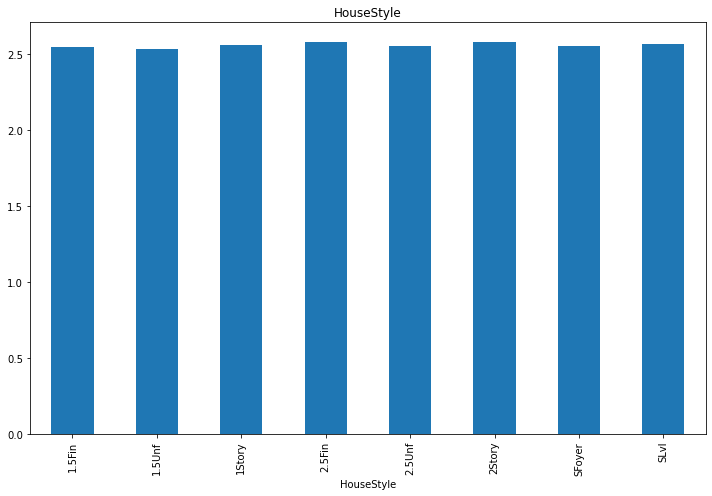

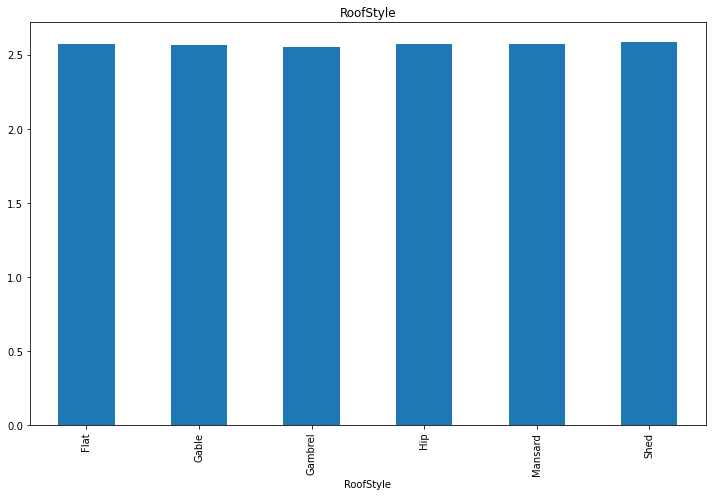

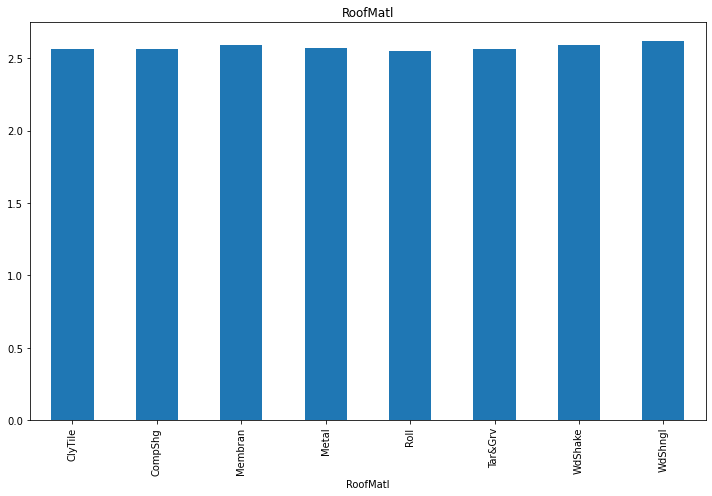

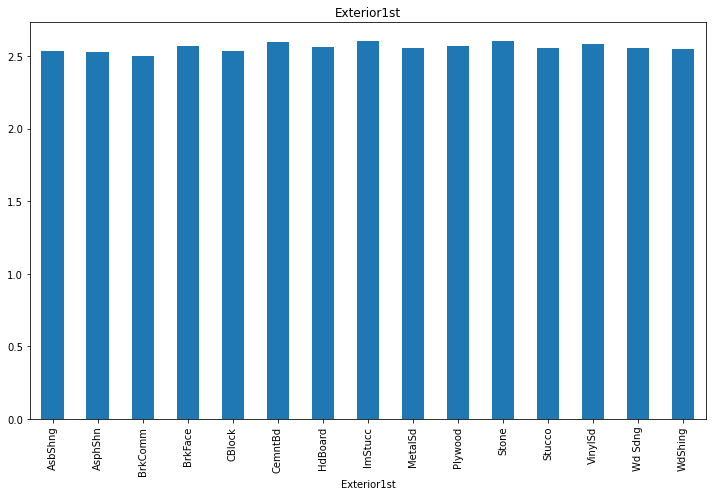

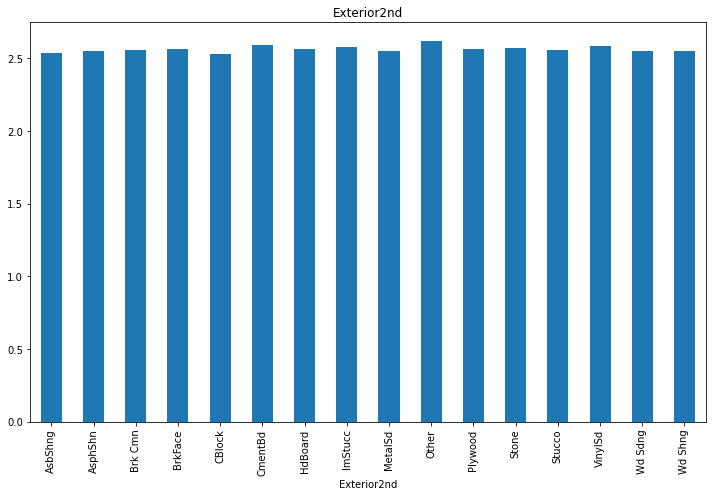

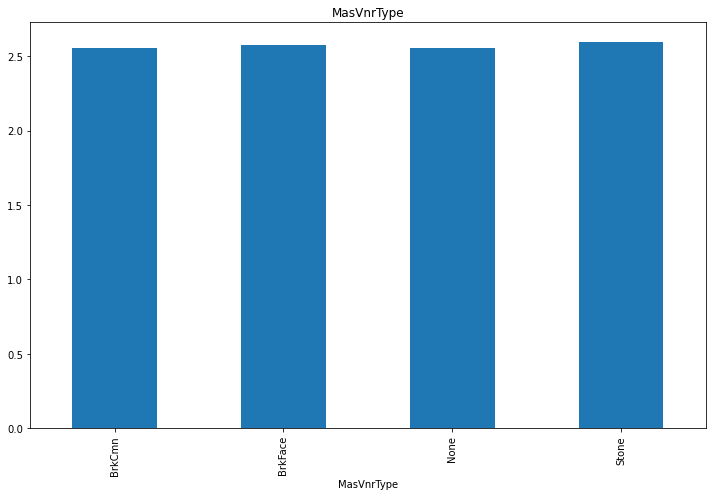

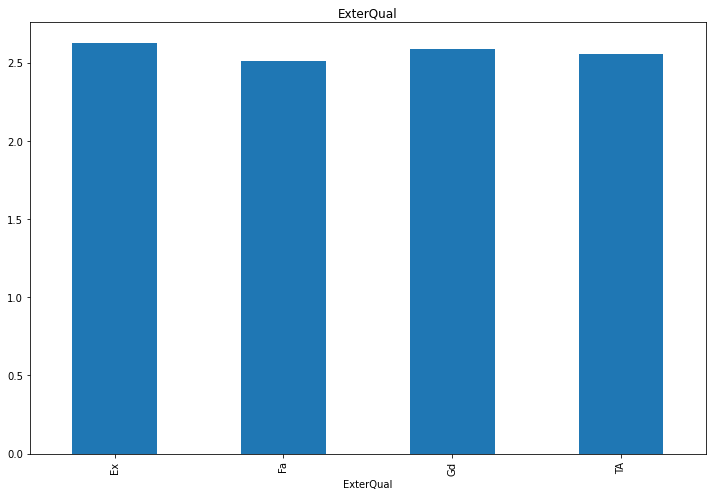

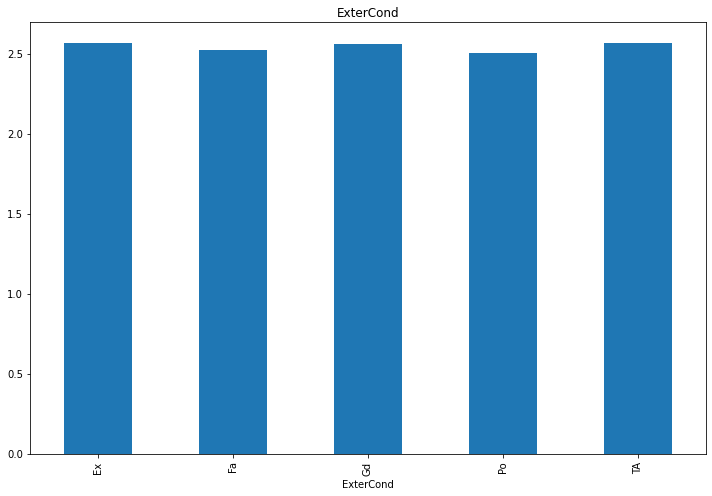

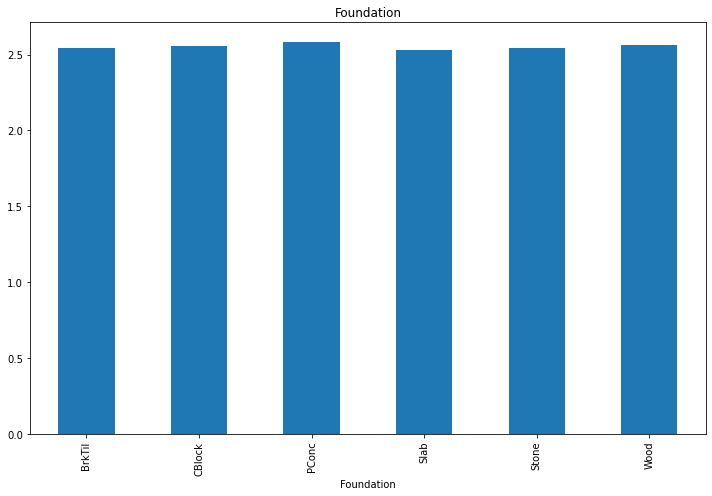

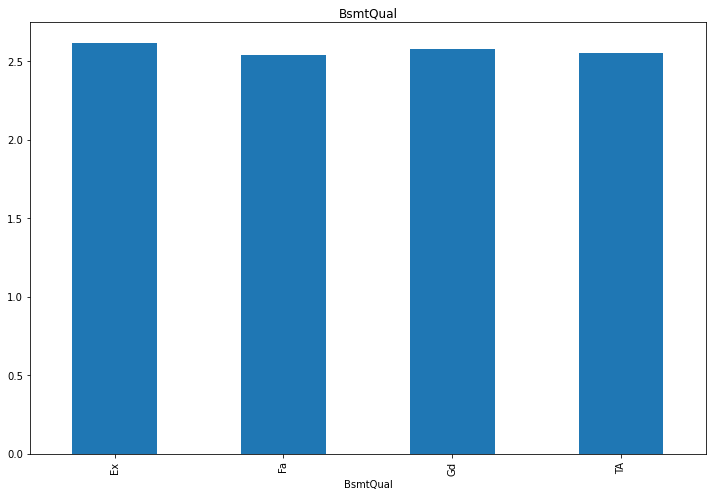

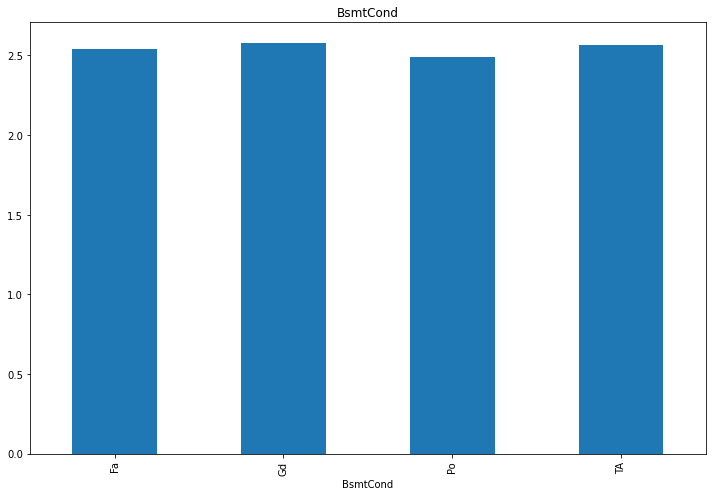

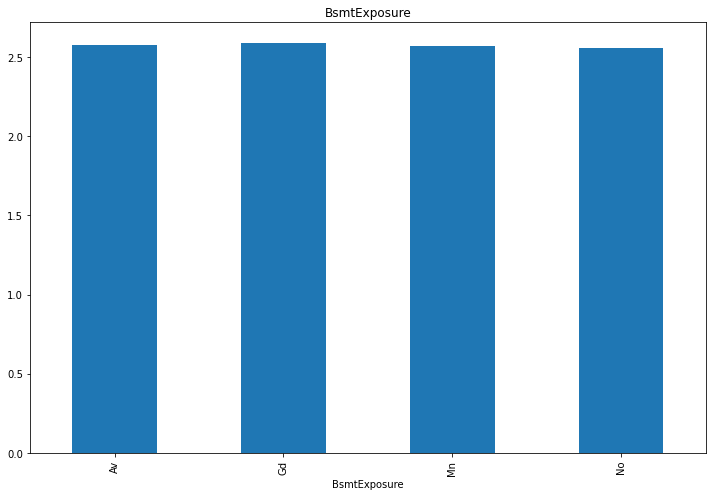

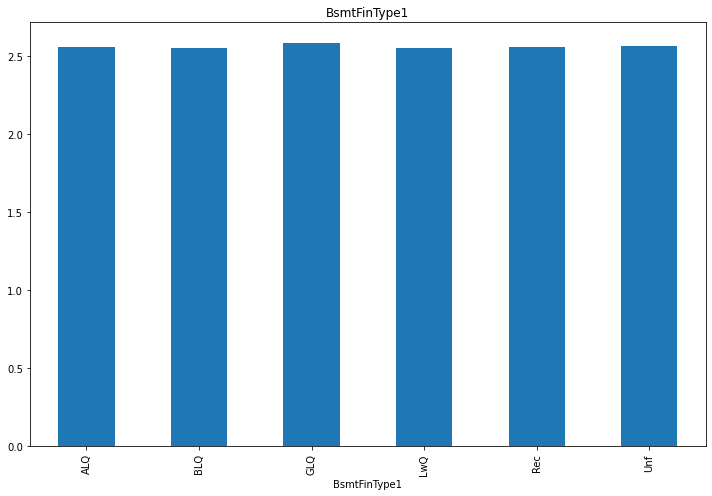

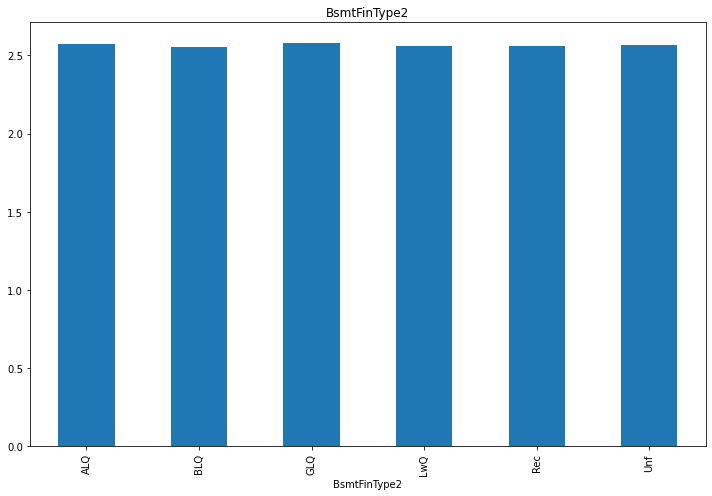

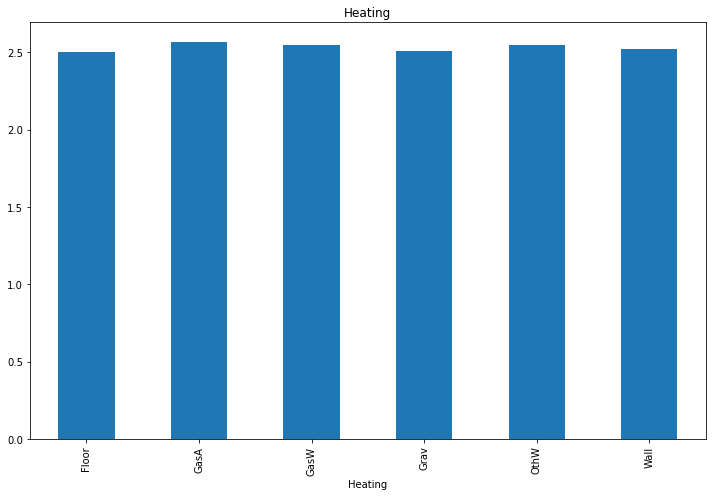

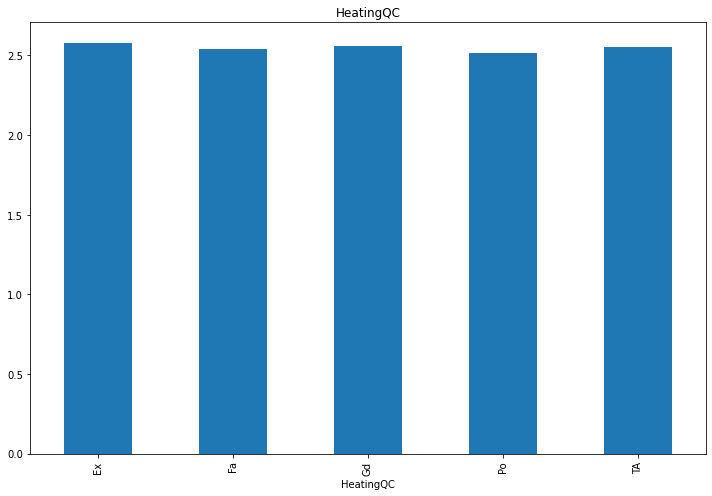

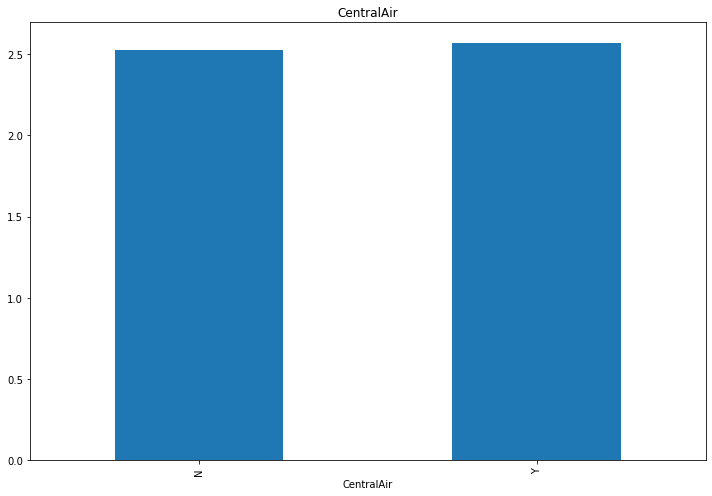

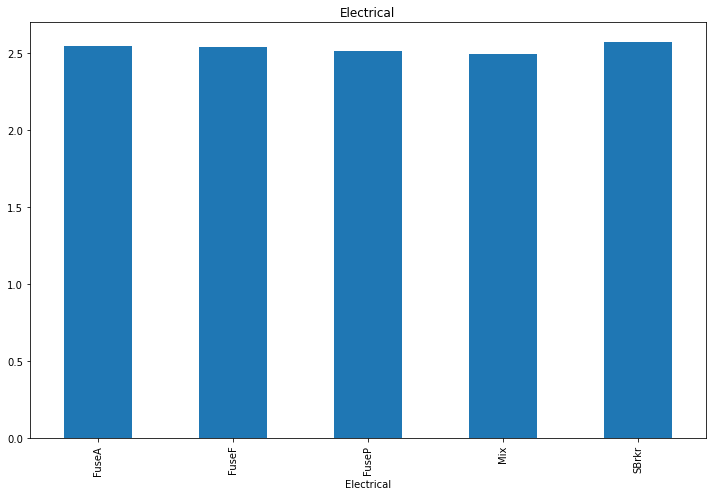

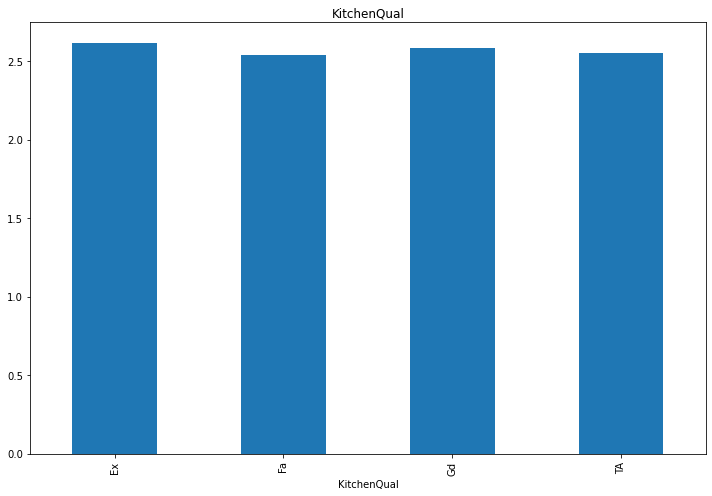

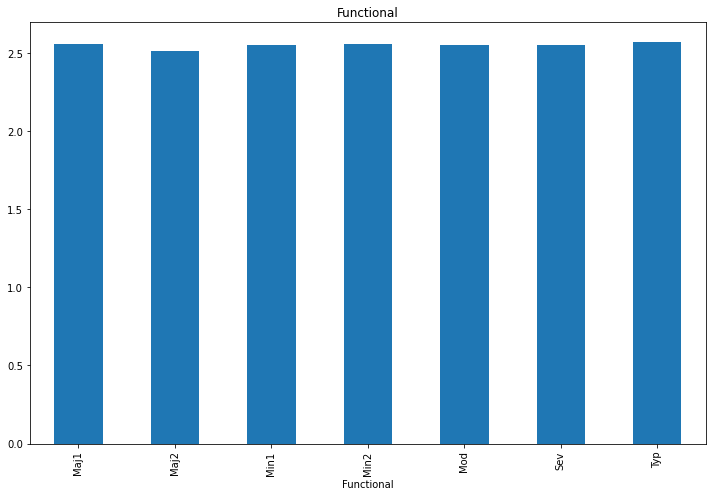

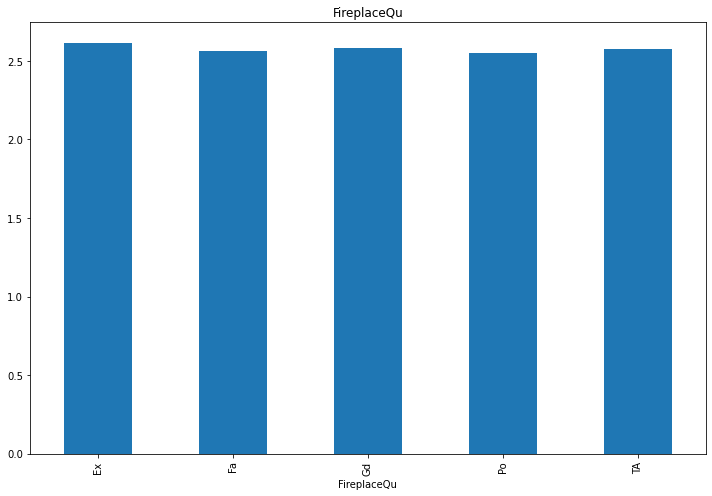

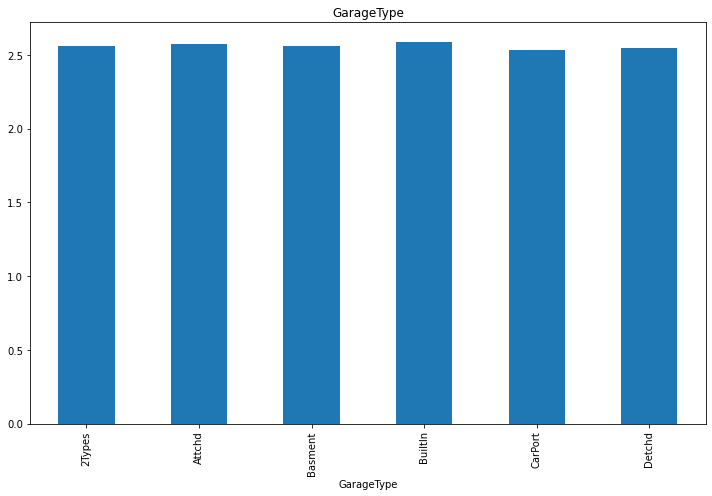

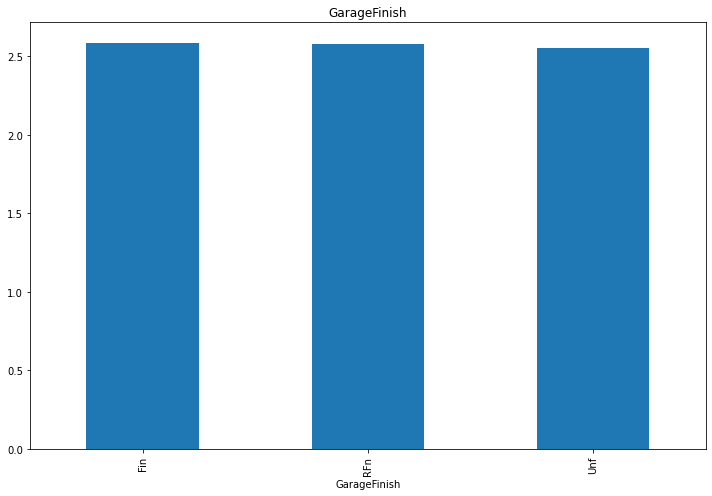

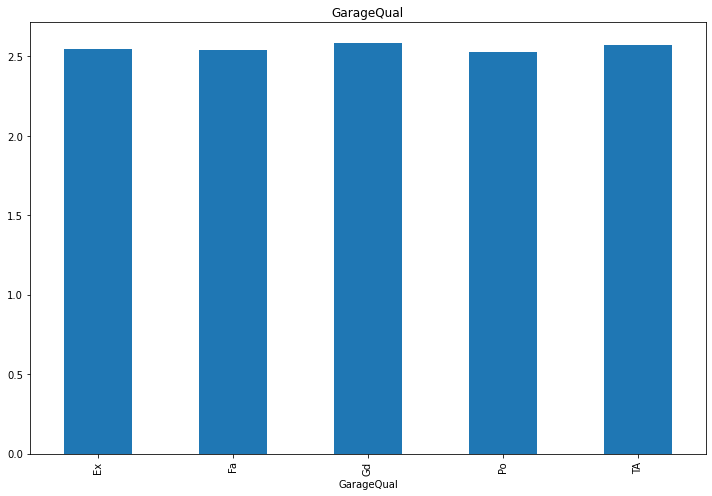

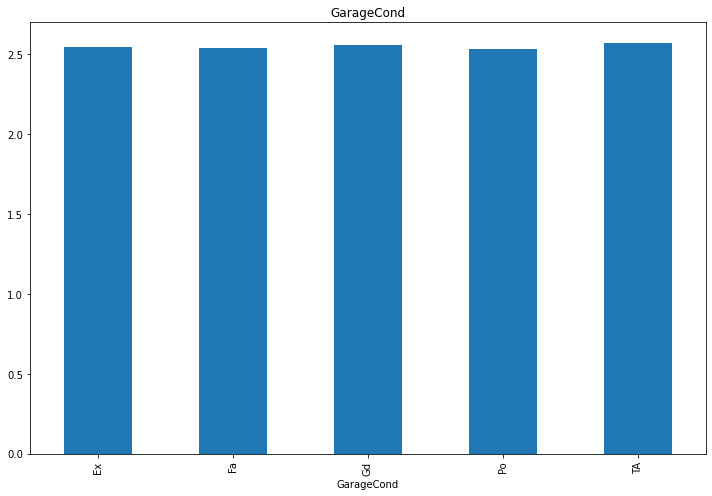

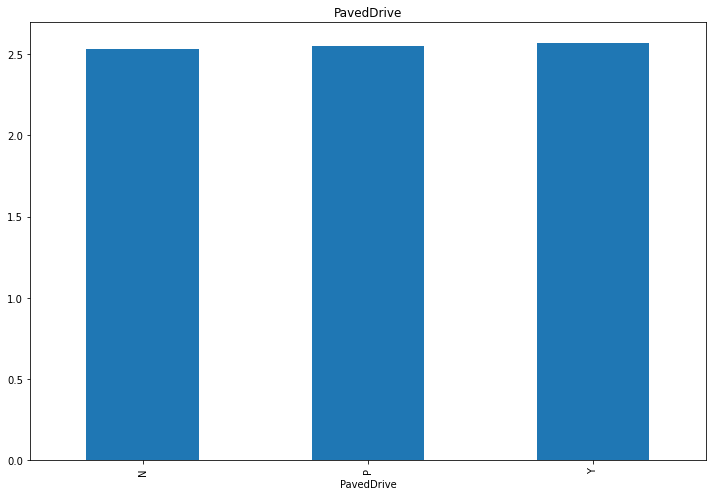

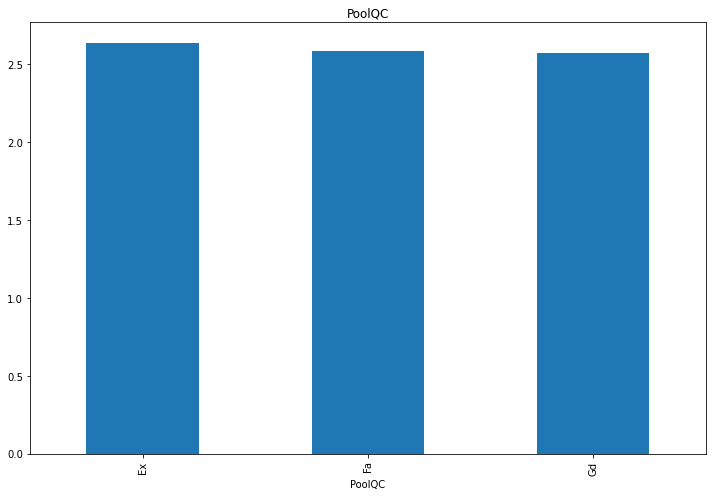

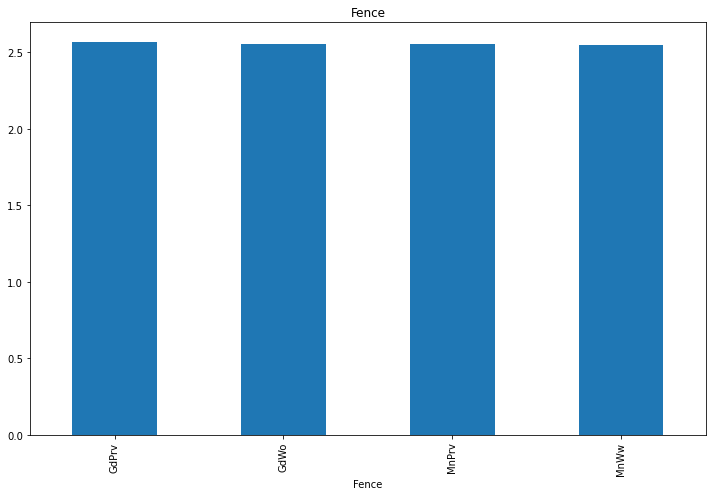

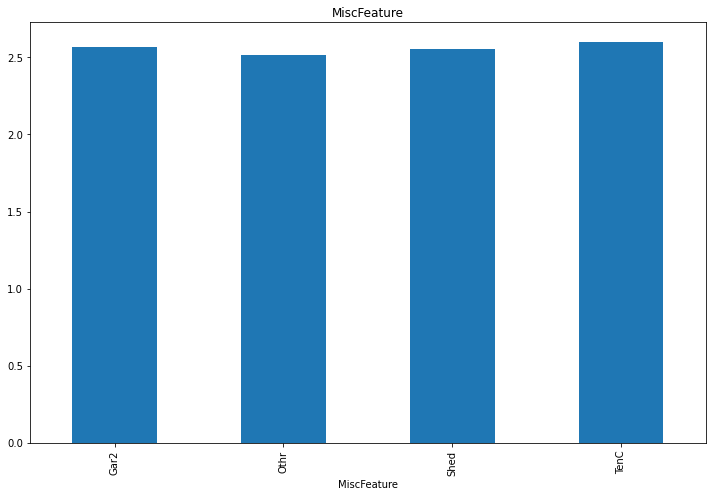

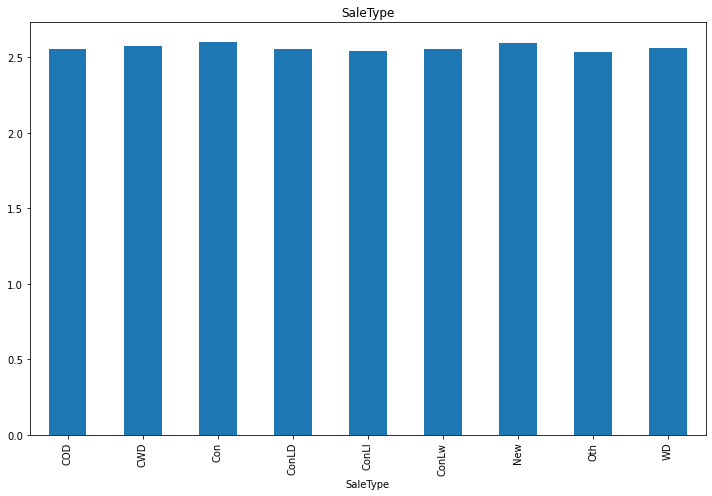

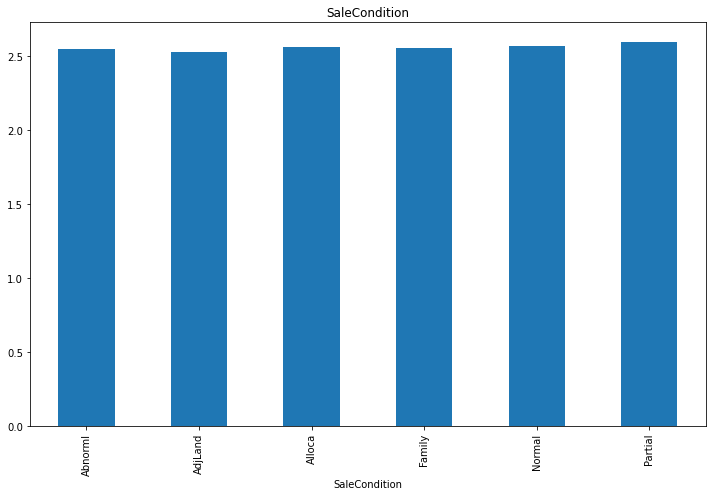

In [70]:
# let see the realtionship b\w categorical variables and SalesPrice

for feature in categorical_feature:
    data = dataset.copy()
    plt.figure(figsize=(10,7))
    data.groupby(feature)['SalePrice'].median().plot.bar()
#     sns.barplot(x=feature, y='SalePrice' ,data=data, ci=False)
    plt.title(feature)
    # xtick rotation
#     plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()